In [1]:
from google.cloud import bigquery
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.optimizers import Adam

from transformers import AutoTokenizer
from transformers import DistilBertForTokenClassification
from transformers import Trainer, TrainingArguments

import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
# # split the string column into separate features
# def split_string2(text):
#     features = text.split(',')
#     for i in range(len(features)):
#         if i == 0 or i == 1:
#             if features[i] != 'nan':
#                 timestamp = datetime.strptime(features[i], '%Y-%m-%d %H:%M:%S%z')
#                 features[i] = timestamp.timestamp()
#             else:
#                 features[i] = datetime(2000, 1, 1, 0, 0, 0, tzinfo=None).timestamp()
#         else:
#             features[i] = float(features[i])
#     return features 

In [18]:
# # split the string column into separate features
# def split_string(text):
#     # Clean up the string by removing unnecessary characters
#     string = text.replace('[', '').replace(']', '').replace('\n', '')

#     # Split the string by spaces
#     elements = string.split()

#     # Convert each element to a float and create a numpy array
#     array = np.array([float(element) for element in elements])
#     return array 

In [19]:
# from datetime import datetime

# # Function to process a single chunk of data
# def process_chunk(chunk):
#     # Replace "Legit" with 1 and "Dodgy" with 0 in 'Label' column
#     chunk['encoded_label'] = chunk['Label'].replace({'Legit': 1, 'Dodgy': 0})
    
#     # Get a list of column names to concatenate
#     cols_to_concat = [col for col in chunk.columns if col not in ['Label', 'encoded_label']]
#     # Concatenate the values in each row of the specified columns, and store the result in a new column called 'concatenated_values'
#     chunk['text'] = chunk[cols_to_concat].apply(lambda row: ','.join(str(val) for val in row), axis=1)

#     return chunk[['text', 'encoded_label']]

# # Read and process the data in chunks
# chunksize = 1000000  # Adjust this value based on your available memory
# processed_data = []

# Run LightGBM first before running below, use if does not have matching input format validation, uncomment to run

In [ ]:
# # Combine relevant columns into a single text column
# with pd.read_csv("./temp/validation.csv", chunksize=chunksize) as reader:
#     i = 0
#     for chunk in reader:
#         print ("----------------Processing chunk: ", i ,"-----------------------")
#         processed_chunk = process_chunk(chunk)
#         processed_data.append(processed_chunk)
#         i += 1

# print ("Finish text column generation, combining chunk....")
# # Combine all processed chunks into a single DataFrame
# processed_data = pd.concat(processed_data, ignore_index=True)
# #     str(new_df['Account Type']) + ' ' + str(new_df['Contract Type']) 
# # + ' ' + str(new_df['Entity']) + ' ' + str(new_df['Tags'])+ ' '  +\
# #     new_df['value_frame'] + ' ' + new_df['gas_frame'] + ' ' + new_df['gas_price_frame'] + ' ' + new_df['input_frame']+ ' '  +\
# #     new_df['receipt_cumulative_gas_used_frame'] + ' ' + new_df['receipt_gas_used_frame'] + new_df['receipt_contract_address_frame']+ ' '  +\
# #     new_df['block_timestamp_frame'] + ' ' + new_df['block_number_frame'] + ' ' + new_df['max_fee_per_gas_frame'] + ' ' +\
# #     new_df['max_priority_fee_per_gas_frame'] + new_df['transaction_type_frame'] + ' ' + new_df['address_frame']+ ' '  +\
# #     new_df['eth_balance_frame'] + ' ' + new_df['receipt_effective_gas_price_frame']

# processed_data

In [ ]:
# features = processed_data['text'].apply(split_string2)
# processed_data['text'] = features
# processed_data

In [ ]:
# # Check for NaN and infinite values
# if processed_data.isnull().values.any():
#     print("There are NaN values in the processed_data dataframe")
    
# # Convert it to float32 for Random Forest library
# from sklearn.preprocessing import MinMaxScaler

# # Convert the "text" column to a numpy array
# text_array = np.array(list(processed_data["text"]))

# # Scale down the values in the array to the range [0, 1]
# scaler = MinMaxScaler()
# text_array_scaled = scaler.fit_transform(text_array)

# # Cast the scaled array to the float32 data type
# text_array_scaled = text_array_scaled.astype(np.float32)

# # Create a new dataframe with the scaled "text" column and the original "encoded_label" column
# new_df = pd.DataFrame({'text': list(text_array_scaled), 'encoded_label': processed_data['encoded_label']})

# # Replace the original "processed_data" dataframe with the new dataframe
# processed_data = new_df

In [ ]:
# processed_data

In [ ]:
# # We have 22 elements in this order Account Type,Tags,value_frame,gas_frame ,block_timestamp_frame,receipt_cumulative_gas_used_frame,receipt_effective_gas_price_frame ,eth_balance_frame
# column_names = [f'feature_{i}' for i in range(0, 22)]

# # Create a new DataFrame with separate columns
# encoded_labels = processed_data["encoded_label"]
# processed_data_expanded = pd.DataFrame(processed_data['text'].tolist(), columns=column_names, index=processed_data.index)
# processed_data_expanded.dropna(inplace=True)
# processed_data_expanded["encoded_labels"] = encoded_labels

# processed_data_expanded

# If have a saved matching input format validation

In [2]:
# # train_processed_data = pd.read_csv('./output/non_nan_balanced_data.csv')
# processed_data_expanded = pd.read_csv('./output/scaled_to_only_validation_one_col.csv')
# # processed_data_expanded = processed_data_expanded.drop('Unnamed: 0', axis=1)

# processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,encoded_labels
0,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
1,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
2,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
3,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
4,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737883,0.583069,0.611366,0.000025,0.0,0.000000e+00,0.0,0.0,0.000027,0.000000e+00,0.016706,...,0.270207,0.000017,0.004046,0.665012,0.030961,0.241181,0.094337,2.172119e-293,0.000032,1
1737884,0.583069,0.611366,0.000025,0.0,0.000000e+00,0.0,0.0,0.000027,0.000000e+00,0.016706,...,0.270207,0.000017,0.004046,0.665012,0.030961,0.241181,0.094337,2.172119e-293,0.000032,1
1737885,0.583069,0.611366,0.000025,0.0,0.000000e+00,0.0,0.0,0.000027,0.000000e+00,0.016706,...,0.270207,0.000017,0.004046,0.665012,0.030961,0.241181,0.094337,2.172119e-293,0.000032,1
1737886,0.583069,0.611366,0.000025,0.0,0.000000e+00,0.0,0.0,0.000027,0.000000e+00,0.016706,...,0.270207,0.000017,0.004046,0.665012,0.030961,0.241181,0.094337,2.172119e-293,0.000032,1


In [3]:
# # processed_data_expanded.dropna(subset=['Account Type'], inplace=True)
# # feature_12 is Tags --> remove
# processed_data_expanded = processed_data_expanded.drop('feature_12', axis=1)

# # Define the desired column names
# new_column_names = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
#                     'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
#                     'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
#                     'feature_18', 'feature_19', 'encoded_tags']

# # Rename the columns
# processed_data_expanded.columns = new_column_names

# processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,encoded_labels
0,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
1,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
2,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
3,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
4,0.630983,0.979582,0.002110,0.0,0.000000e+00,0.0,0.0,0.002113,0.000000e+00,0.001864,...,0.606367,0.000104,0.030820,0.857497,0.239467,0.366357,0.029047,7.289669e-295,0.000019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737883,0.583069,0.611366,0.000025,0.0,0.000000e+00,0.0,0.0,0.000027,0.000000e+00,0.016706,...,0.270207,0.000017,0.004046,0.665012,0.030961,0.241181,0.094337,2.172119e-293,0.000032,1
1737884,0.583069,0.611366,0.000025,0.0,0.000000e+00,0.0,0.0,0.000027,0.000000e+00,0.016706,...,0.270207,0.000017,0.004046,0.665012,0.030961,0.241181,0.094337,2.172119e-293,0.000032,1
1737885,0.583069,0.611366,0.000025,0.0,0.000000e+00,0.0,0.0,0.000027,0.000000e+00,0.016706,...,0.270207,0.000017,0.004046,0.665012,0.030961,0.241181,0.094337,2.172119e-293,0.000032,1
1737886,0.583069,0.611366,0.000025,0.0,0.000000e+00,0.0,0.0,0.000027,0.000000e+00,0.016706,...,0.270207,0.000017,0.004046,0.665012,0.030961,0.241181,0.094337,2.172119e-293,0.000032,1


In [4]:
# # Define the features and the target
# # scale_pos_weight = len(processed_data_expanded[processed_data_expanded['encoded_label'] == 1]) / len(processed_data_expanded[processed_data_expanded['encoded_label'] == 0])
# X_val = processed_data_expanded.drop('encoded_labels', axis=1)
# y_val = processed_data_expanded['encoded_labels']

# LightGBM, for first run, uncomment to run

In [ ]:
# # train_processed_data = pd.read_csv('./output/non_nan_balanced_data.csv')
# train_processed_data = pd.read_csv('./output/one_text_col_data.csv')

# train_processed_data

In [ ]:
# # one_text_col_data
# features = train_processed_data['text'].apply(split_string2) #split_string2 if one_text_col_data.csv
# train_processed_data['text'] = features
# train_processed_data

In [ ]:
# train_processed_data['text'][0]

In [ ]:
# # Check for NaN and infinite values
# if train_processed_data.isnull().values.any():
#     print("There are NaN values in the processed_data dataframe")
    
# # Convert it to float32 for Random Forest library
# from sklearn.preprocessing import MinMaxScaler

# # Convert the "text" column to a numpy array
# text_array = np.array(list(train_processed_data["text"]))

# # Scale down the values in the array to the range [0, 1]
# scaler = MinMaxScaler()
# text_array_scaled = scaler.fit_transform(text_array)

# # Cast the scaled array to the float32 data type
# text_array_scaled = text_array_scaled.astype(np.float32)

# # Create a new dataframe with the scaled "text" column and the original "encoded_label" column
# new_df = pd.DataFrame({'text': list(text_array_scaled), 'encoded_label': train_processed_data['encoded_label']})

# # Replace the original "processed_data" dataframe with the new dataframe
# train_processed_data = new_df

In [ ]:
# # split the string column into separate features
# def split_string(text):
#     # Clean up the string by removing unnecessary characters
#     string = text.replace('[', '').replace(']', '').replace('\n', '')

#     # Split the string by spaces
#     elements = string.split()

#     # Convert each element to a float and create a numpy array
#     array = np.array([float(element) for element in elements])
#     return array 

# # processed_data = processed_data['text'].astype(np.float32)
# features = train_processed_data['text'].apply(split_string)
# features

In [ ]:
# # train_processed_data['text'] = features
# train_processed_data

In [ ]:
# # We have 22 elements in this order Account Type,Tags,value_frame,gas_frame ,block_timestamp_frame,receipt_cumulative_gas_used_frame,receipt_effective_gas_price_frame ,eth_balance_frame
# train_column_names = [f'feature_{i}' for i in range(0, 22)]

# # Create a new DataFrame with separate columns
# train_encoded_labels = train_processed_data["encoded_label"]
# train_processed_data_expanded = pd.DataFrame(train_processed_data['text'].tolist(), columns=train_column_names, index=train_processed_data.index)
# train_processed_data_expanded.dropna(inplace=True)
# train_processed_data_expanded["encoded_labels"] = train_encoded_labels

# train_processed_data_expanded

# End LightGBM if run first time

In [2]:
train_processed_data_expanded = pd.read_csv('./output/scaled_train_data.csv')
train_processed_data_expanded = train_processed_data_expanded.drop('Unnamed: 0', axis=1)

train_processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,encoded_tags
0,0.623455,0.997611,0.002130,0.000000,3.501077e-07,0.0,0.000000,0.002130,7.599510e-07,0.000547,...,0.0,0.000104,0.027793,0.860078,0.239291,0.361326,2.854600e-02,1.905827e-293,0.000015,217
1,0.623455,0.997611,0.002130,0.000000,3.501077e-07,0.0,0.000000,0.002130,7.599510e-07,0.000547,...,0.0,0.000104,0.027793,0.860078,0.239291,0.361326,2.854600e-02,1.905827e-293,0.000015,217
2,0.623455,0.997611,0.002130,0.000000,3.501077e-07,0.0,0.000000,0.002130,7.599510e-07,0.000547,...,0.0,0.000104,0.027793,0.860078,0.239291,0.361326,2.854600e-02,1.905827e-293,0.000015,217
3,0.623455,0.997611,0.002130,0.000000,3.501077e-07,0.0,0.000000,0.002130,7.599510e-07,0.000547,...,0.0,0.000104,0.027793,0.860078,0.239291,0.361326,2.854600e-02,1.905827e-293,0.000015,217
4,0.623455,0.997611,0.002130,0.000000,3.501077e-07,0.0,0.000000,0.002130,7.599510e-07,0.000547,...,0.0,0.000104,0.027793,0.860078,0.239291,0.361326,2.854600e-02,1.905827e-293,0.000015,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915131,0.354652,0.999975,0.021302,0.000057,5.835128e-05,0.0,0.351985,0.000002,6.332925e-05,0.000094,...,0.0,0.000091,0.018721,0.680482,1.000000,0.465448,7.123401e-07,2.652135e-296,0.000009,203
5915132,0.354652,0.999975,0.021302,0.000057,5.835128e-05,0.0,0.351985,0.000002,6.332925e-05,0.000094,...,0.0,0.000104,0.027793,0.860078,0.239291,0.361326,2.854600e-02,1.905827e-293,0.000015,217
5915133,0.354652,0.999975,0.021302,0.000057,5.835128e-05,0.0,0.351985,0.000002,6.332925e-05,0.000094,...,0.0,0.000104,0.027793,0.860078,0.239291,0.361326,2.854600e-02,1.905827e-293,0.000015,217
5915134,0.354652,0.999975,0.021302,0.000057,5.835128e-05,0.0,0.351985,0.000002,6.332925e-05,0.000094,...,0.0,0.000104,0.027793,0.860078,0.239291,0.361326,2.854600e-02,1.905827e-293,0.000015,217


In [3]:
# Define the features and the target
# scale_pos_weight = len(processed_data_expanded[processed_data_expanded['encoded_label'] == 1]) / len(processed_data_expanded[processed_data_expanded['encoded_label'] == 0])
X = train_processed_data_expanded.drop('encoded_tags', axis=1)
y = train_processed_data_expanded['encoded_tags']

# Remove the Tag class with below 10 count
counts = y.value_counts()
y_filtered = y[y.isin(counts[counts > 10].index)] # 10 is cutof as mentioned in Preprocessing step
X_filtered = X[y.isin(counts[counts > 10].index)]

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=25, stratify=y_filtered)

In [4]:
# # Calculate the scale_pos_weight if you haven't done it yet
# scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
# scale_pos_weight 

import lightgbm as lgb

# Compute class weights
class_weights = y_train.value_counts().min() / y_train.value_counts()

# Convert the dataset into DMatrix
dtrain = lgb.Dataset(X_train, label=y_train, weight=y_train.map(class_weights))
dtest = lgb.Dataset(X_test, label=y_test, weight=y_test.map(class_weights))

In [26]:
# # Create the model
# # Calculate weights
# weights = np.where(y_train == 0, 69, 0.1)

# # lgbm = lgb.LGBMClassifier( is_unbalance=True) # 0.99 scale_pos_weight scale_pos_weight=9
# lgbm = lgb.LGBMClassifier(objective='binary',
#                           scale_pos_weight=scale_pos_weight, # 69
# #                           is_unbalance=True,
# #                           max_depth=6,
#                           min_child_weight=1,
#                           subsample=0.8,
#                           colsample_bytree=0.8,
#                           learning_rate=0.01,
#                           n_estimators=1000)

# # Fit the model
# lgbm.fit(X_train, y_train)#, sample_weight=weights)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1,
               n_estimators=1000, objective='binary',
               scale_pos_weight=0.03212176665027204, subsample=0.8)

In [ ]:
# lgbm.booster_.save_model('./temp/lgbm_model.txt') # lgbm_model_69 lgbm_model_019 lgbm_mode

In [ ]:
# train_processed_data_expanded.to_csv("./temp/scaled_train_one_col.csv")

# Training

In [23]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss


# Create a LightGBM dataset
data = dtrain

# Define parameters of the already trained model
params = {
    'boosting_type': 'gbdt',             # memory issue
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
#     'scale_pos_weight': scale_pos_weight, 
#     'min_child_weight': 5,
    'subsample': 0.8,                    # memory issue
    'colsample_bytree': 0.8,
    'learning_rate': 0.05,
#     'n_estimators': 1000,                 # memory issue
#     'max_bin': 63,                       # reduced for less memory usage
#     'num_leaves': 31,                    # memory issue
    'device': 'gpu'
}

# Cannot run Cross validation due to computational constraint
# cv_results = lgb.cv(
#     params,
#     data,
#     num_boost_round=2,  # REDUCE DUE TO MEMORY LIMITATION LOCALLY!!!!!!!!!!!!!!!!!
#     nfold=3, # starts with 2, not match XGBoost
#     metrics=['multi_error', 'multi_logloss'],
#     callbacks=[lgb.callback.log_evaluation(period=1)]
# #     verbose_eval=True
# )

print("----------------------------------------------------------")

# Training the model
# num_boost_round = len(cv_results['multi_error-mean'])
bst = lgb.train(params, data, num_boost_round=3) # 3: match with XGBoost, precision 0.99, 1 for others

----------------------------------------------------------
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3212
[LightGBM] [Info] Number of data points in the train set: 4732037, number of used features: 19
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (72.21 MB) transferred to GPU in 0.104620 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] St

[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -5.398163
[LightGBM] [Info] Start tr

In [15]:
bst.save_model('./output/lgbm_model_005_lr.txt')

# Test data

Please make sure to save model above, we need to load it below

In [16]:
lgbm = lgb.Booster(model_file='./output/lgbm_model_005_lr.txt')# lgbm_model_005_lr lgbm_model

In [17]:
# Get feature importance
importance = lgbm.feature_importance()

# Get feature names
feature_name = lgbm.feature_name()

# Create a data frame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_name,
    'Importance': importance
})

importance_df = importance_df.sort_values('Importance', ascending = False)

print(importance_df)

       Feature  Importance
19  feature_19        2029
0    feature_0        1989
7    feature_7        1835
16  feature_16        1511
14  feature_14        1360
10  feature_10        1358
9    feature_9        1337
1    feature_1        1268
15  feature_15        1098
17  feature_17        1028
12  feature_12         914
2    feature_2         912
13  feature_13         782
6    feature_6         737
3    feature_3         618
4    feature_4         444
8    feature_8         410
5    feature_5         163
11  feature_11          97
18  feature_18           0


f19 : MeanSentETHPerLifetime --> tag cluster

f0: block_timestamp_min --> address

f7: num_deposits_sum --> address

f16: NumWithdrawalsPerMonth --> tag cluster

f14: StdDevBalance --> tag cluster
    
f10: lifetime --> address

f9: mean_time_between_transactions --> address

f1: block_timestamp_max --> address
    
f15: ClusterLifetime --> tag cluster

f17: NumDepositsPerMonth --> tag cluster

The distribution of importance is more widespread here

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Predict and evaluate the model
y_test_pred = lgbm.predict(X_test)
y_test_pred

array([[1.26954083e-05, 1.26953897e-05, 3.25852447e-18, ...,
        1.26954412e-05, 1.27015385e-05, 3.25852447e-18],
       [1.29057702e-05, 1.29057513e-05, 3.31251797e-18, ...,
        1.29058042e-05, 1.29059042e-05, 3.31251797e-18],
       [1.29201050e-05, 1.29190161e-05, 3.31624068e-18, ...,
        1.42303768e-05, 1.29185919e-05, 3.31624068e-18],
       ...,
       [1.28659251e-05, 1.28673690e-05, 3.30267019e-18, ...,
        1.28661719e-05, 1.28744087e-05, 3.30267019e-18],
       [1.26954195e-05, 1.26954009e-05, 3.25852734e-18, ...,
        1.26954524e-05, 1.27020961e-05, 3.25852734e-18],
       [1.29006702e-05, 1.29035560e-05, 3.31195449e-18, ...,
        1.29034375e-05, 1.29022940e-05, 3.31195449e-18]])

In [19]:
## Do this if load model from txt file
y_pred_class = np.argmax(y_test_pred, axis=1) #(y_test_pred > 0.5).astype(int)
# i = 0
# for val in y_pred_class:
#     if val == 0:
#         print ("Here :", i)
#         break
#     i += 1

# i = 0
# for val in y_val_pred:
#     if val < 0.5:
#         print ("Here :", i)
#         break
#     i += 1
y_pred_class

array([217,  63, 226, ..., 117, 217, 203], dtype=int64)

In [20]:
print (classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3587
           1       1.00      1.00      1.00      4402
           4       1.00      1.00      1.00      2252
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00       291
           7       1.00      1.00      1.00      1291
           8       1.00      1.00      1.00       385
           9       1.00      1.00      1.00      4660
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00      3572
          12       0.94      1.00      0.97        31
          13       1.00      1.00      1.00      2626
          14       1.00      0.99      0.99        93
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00      4993
          17       1.00      1.00      1.00       775
          18       1.00      1.00      1.00       354
          19       1.00    

In [21]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# precision = precision_score(y_test, y_pred_class) # y_pred_class y_val_pred
# recall = recall_score(y_test, y_pred_class)
# f1 = f1_score(y_test, y_pred_class)

# # Calculate the probabilities for the ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred_class)

# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}")
# print(f"F1-score: {f1:.3f}")
# print(f"ROC AUC: {roc_auc:.3f}")

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_test_pred_bin = lb.transform(y_pred_class)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_test_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9968900938469525


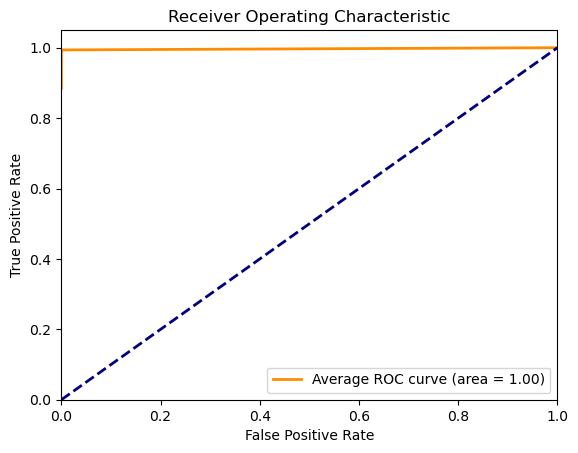

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

# # Compute ROC curve and ROC area
# fpr, tpr, _ = roc_curve(y_test, y_pred_class)
# roc_auc = auc(fpr, tpr)

# # Plot
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # random classifier
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")


# plt.savefig('./output/lightGBM.png')
# plt.show()

# Compute ROC curve and ROC area for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot average ROC curve
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2, label='Average ROC curve (area = %0.2f)' % roc_auc["macro"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('./output/lightGBM.png')
plt.show()

In [ ]:
# from sklearn.metrics import average_precision_score

# # LightGBM
# lgb_auprc = average_precision_score(y_test, y_pred_class)
# print(f'LightGBM AUPRC: {lgb_auprc}')